<a href="https://colab.research.google.com/github/katerinbarrera21/Simulacion/blob/main/tareas2/EXAMEN_FINAL_Correccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La empresa desea saber si tiene los recursos necesarios para soportar la demanda de los
usuarios. En base a ello, diseñe y desarrolle un modelo y/o script que permita realizar la
simulación de movilizaciones de personas desde un lugar del Ecuador a otro para la
empresa de turismo de venta de tickets y ver si el número de buses darán soporte:
* Investigar los lugares de mayor afluencia dentro del Ecuador minimo 6.
* El número de la flota de buses son 5, con una capacidad de 40 pasajeros cada uno.
* Generar personas, un nombre, el género(Bernoulli), y la edad adultos (Poison)
aleatoriamente.
* Un usuario realiza la compra de un boleto desde un lugar de origen a un destino y
puede comprar de 1 a 6 tickets.
* Es escoge aleatoriamente el origen y el destino con mayores pesos de selección lo
de mayor afluencia.
* Se agrega el tiempo de la compra la misma que tiene una distribución de
probabilidad normal con media de 10 minutos y desviación estándar de 2 minutos.
* El bus sale cada hora, este o no lleno, una vez que el bus sale no pueden subir, hasta
que llegue a la parada, regresa el bus el mismo tiempo que se demora en llegar al
destino, generar el tiempo de viaje utilizando una distribución de 6 horas y
desviacion estandar de 4 horas.
* Agregar graficas/reportes
* Venta de tickets.
* Personas que se quedaron sin comprar tickets
* Lugares de origen y destino más visitados.
* Numero de buses y el uso del mismo diarios
Este proceso, se ejecuta diariamente, ejecutar por 7 dias.





In [1]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import simpy
import random
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.stats import bernoulli
import numpy as np 


In [82]:


NOMBREUSUARIO =''
GENEROUSUARIO= ''
EDADADULTO=0;
LUGARESVISITADOS= ['Quito','Guayaquil', 'Cuenca', 'Baños', 'Cotopaxi', 'Montañita']
probLugares=[0.5, 0.3, 0.4, 0.1, 0.3, 0.2]

ORIGEN =0
salidaBus=60 
PeriodotiempoDeViaje=360
TIEMPO_SIMULACION= 420
cont=0
destino=[]
personas=[]
totalAsientosUsados=0
nombre=0
capBus = 40 
numBusDis = 5 
horapre = 0

boletosPorDia={}
contarBoletosPerdidos={}
contVisitarLugar={}
lugarOrigen={}
buses1=crearBus()
buses2=crearBus()
buses3=crearBus()
buses4=crearBus()
buses5=crearBus()
busNomb=[1,2,3,4,5]


class estacionBus(object):
    
    def __init__(self, env):
        self.env=env        
        self.numbuses =5
        self.busesCap =40
        self.buses = simpy.Resource(env, 5)
    
    def origenDestinoTiempo(self, tiempollegar): 
      yield self.env.timeout(tiempoDemoraViaje())

    def destinoOrigenTiempo(self, tiempollegar):
      yield self.env.timeout(tiempoDemoraViaje())

    def viajar(self):
      yield self.env.timeout(tiempoDemoraViaje())
      yield self.env.timeout(tiempoDemoraViaje())
          

def persona():
  nombre = cont+1
  genero = bernoulli.rvs(0.5, size=1)
  edad = poisson.rvs(20, size=1)

def crearNombreUsuario():
  global nombre
  nombre += 1
  return nombre

def crearGeneroUsuario():
  genero = bernoulli.rvs(0.5, size=1)
  return genero
def crearEdadUsuario():
  edad= poisson.rvs(20, size=1)
  return edad

def tiempoDemoraViaje():
    return abs(random.normalvariate(6*60, 4*60))


def estacionLugaresOrigen():
  probLugares=[0.5, 0.3, 0.4, 0.1, 0.3, 0.2]
  origen = random.choices(LUGARESVISITADOS, probLugares, cont1=1)
  destino = random.choices(LUGARESVISITADOS, probLugares, cont1=1)
  if origen == destino:
        while origen == destino:
            destino = random.choices(LUGARESVISITADOS, probLugares, cont1=1)

  return  origen[0], destino[0]


def  crearPersona():
  nombre = crearNombreUsuario()
  genero = crearGeneroUsuario()
  edad= crearEdadUsuario()
  return nombre, genero, edad


def crearBus():
  bus={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
  return bus
def compratotalBoletos():
  totalCompraBoletos = random.randint(1, 6)
  return totalCompraBoletos

def tiempoCompraBoleto():
   tiempoCompraboleto =abs(math.ceil(np.random.normal(10, 2, 1)))
   return tiempoCompraboleto




def comprarBoletoBus (env, nombre,estacionBuss):
    global horapre
    global totalAsientosUsados
    global dia

    boletosTotal = compratotalBoletos()

    print ('REQUIERE COMPRAR UN TOTAL DE [', boletosTotal,']')

    if dia in boletosPorDia:
        boletosPorDia[dia]=boletosPorDia[dia]+boletosTotal
    else:
        boletosPorDia[dia]=boletosTotal

    tiempoComprarBoleto = tiempoCompraBoleto()
    print ('TOTAL TIEMPO DE ESPERA PARA COMPRAR UN TOTAL BOLETOS [', tiempoComprarBoleto,']') 
    totalAsientosUsados = totalAsientosUsados+boletosTotal
    yield env.timeout(tiempoComprarBoleto)
    print('PERSONA [ %s ] OBTINE SU BOLETO EN TIEMPO %.2f' % (nombre, env.now))
    hora =    math.ceil(env.now/60) - (24*(dia)) 
    print("ASIENTOS QUE HAN SIDO USADOS TOTAL: [ " +str(totalAsientosUsados))

    origen = random.choices(LUGARESVISITADOS, probLugares, k=1)
    destino = random.choices(LUGARESVISITADOS, probLugares, k=1)
    if origen == destino:
        while origen == destino:
            destino = random.choices(LUGARESVISITADOS, probLugares, k=1)
    origen = origen[0]
    destino=destino[0]
    if hora != horapre :
        horapre = hora
        with estacionBuss.buses.request() as bus:
            yield bus
            busEnUso=busNomb.pop()
            print("BUS SALE DE LA ESTACION [ "+str(busEnUso)+ "] FECHA: [ "+ str(dia) + "], LUGAR DE ORIGEN: [ " +str(origen)+ "], LUGAR DESTINO: [ " + str(destino), "]")
            if destino in contVisitarLugar:
                contVisitarLugar[destino]=contVisitarLugar[destino]+1
            else:
                contVisitarLugar[destino]=1
            if origen in lugarOrigen:
                lugarOrigen[origen]=lugarOrigen[origen]+1
            else:
                lugarOrigen[origen]=1
            if dia in contarBoletosPerdidos:
                boletosperdidos = (totalAsientosUsados-40)
                if boletosperdidos > 0: 
                    contarBoletosPerdidos[dia]=contarBoletosPerdidos[dia]+boletosperdidos
                    totalAsientosUsados = 0
            else:
                boletosperdidos = (totalAsientosUsados-40)
                if boletosperdidos > 0: 
                    contarBoletosPerdidos[dia]=(totalAsientosUsados-40)
                    totalAsientosUsados = 0
            if busEnUso == 1:
                buses1[dia]=buses1[dia]+1
            elif busEnUso == 2:
                buses2[dia]=buses2[dia]+1
            elif busEnUso == 3:
                buses3[dia]=buses3[dia]+1
            elif busEnUso == 4:
                buses4[dia]=buses4[dia]+1
            elif busEnUso == 5:
                buses5[dia]=buses5[dia]+1
            yield env.process(estacionBuss.viajar())
            busNomb.append(busEnUso)
            print("BUS VUELVE A  LA ESTACION [ "+str(busEnUso)+ "] FECHA: [ "+ str(dia) + "], LUGAR DE ORIGEN: [ " +str(origen)+ "], LUGAR DESTINO: [ " + str(destino), "]")
            print('FINALIZA VIAJE BUS [ %s ] EN TIEMPO ACTUAL %.2f' % (str(busEnUso), env.now))


def ejecutar_simulacion(env):
    estacionBuss=estacionBus(env)
    global dia
    while True:                  
        dia = math.floor(env.now/1440) 
        yield env.timeout(random.randint(1, 50))
        nombre,genero,edad = crearPersona()
        if (genero==1):
          gen= 'Hombre'
        else:
          gen ='Mujer'
        print('PERSONA NOMBRE: [', nombre,'] GENERO:[', gen,'] EDAD',edad)
        env.process(comprarBoletoBus(env,nombre,estacionBuss))


print('ESTACIÓN DE BUSES ')
env=simpy.Environment()
env.process(ejecutar_simulacion(env))
env.run(until = 10080) # 7 Dias    


ESTACIÓN DE BUSES 
PERSONA NOMBRE: [ 1 ] GENERO:[ Mujer ] EDAD [21]
REQUIERE COMPRAR UN TOTAL DE [ 5 ]
TOTAL TIEMPO DE ESPERA PARA COMPRAR UN TOTAL BOLETOS [ 9 ]
PERSONA [ 1 ] OBTINE SU BOLETO EN TIEMPO 59.00
ASIENTOS QUE HAN SIDO USADOS TOTAL: [ 5
BUS SALE DE LA ESTACION [ 5] FECHA: [ 0], LUGAR DE ORIGEN: [ Montañita], LUGAR DESTINO: [ Baños ]
PERSONA NOMBRE: [ 2 ] GENERO:[ Mujer ] EDAD [17]
REQUIERE COMPRAR UN TOTAL DE [ 5 ]
TOTAL TIEMPO DE ESPERA PARA COMPRAR UN TOTAL BOLETOS [ 8 ]
PERSONA [ 2 ] OBTINE SU BOLETO EN TIEMPO 83.00
ASIENTOS QUE HAN SIDO USADOS TOTAL: [ 10
BUS SALE DE LA ESTACION [ 4] FECHA: [ 0], LUGAR DE ORIGEN: [ Quito], LUGAR DESTINO: [ Cotopaxi ]
PERSONA NOMBRE: [ 3 ] GENERO:[ Mujer ] EDAD [21]
REQUIERE COMPRAR UN TOTAL DE [ 5 ]
TOTAL TIEMPO DE ESPERA PARA COMPRAR UN TOTAL BOLETOS [ 12 ]
PERSONA NOMBRE: [ 4 ] GENERO:[ Hombre ] EDAD [19]
REQUIERE COMPRAR UN TOTAL DE [ 4 ]
TOTAL TIEMPO DE ESPERA PARA COMPRAR UN TOTAL BOLETOS [ 10 ]
PERSONA [ 3 ] OBTINE SU BOLETO EN TI

In [83]:
print (boletosPorDia)
print (contarBoletosPerdidos)
print (contVisitarLugar)
print (lugarOrigen)
print (buses1)
print (buses2)
print (buses3)
print (buses4)
print (buses5)

{0: 189, 1: 192, 2: 197, 3: 184, 4: 211, 5: 193, 6: 185}
{0: 69, 1: 41, 2: 100, 3: 59, 4: 52, 5: 20, 6: 35}
{'Baños': 6, 'Cotopaxi': 7, 'Cuenca': 24, 'Montañita': 11, 'Quito': 13, 'Guayaquil': 10}
{'Montañita': 8, 'Quito': 19, 'Cotopaxi': 14, 'Guayaquil': 12, 'Cuenca': 15, 'Baños': 3}
{0: 3, 1: 2, 2: 2, 3: 2, 4: 1, 5: 3, 6: 2}
{0: 3, 1: 1, 2: 3, 3: 2, 4: 2, 5: 1, 6: 1}
{0: 3, 1: 2, 2: 1, 3: 1, 4: 2, 5: 1, 6: 2}
{0: 2, 1: 2, 2: 3, 3: 2, 4: 1, 5: 4, 6: 1}
{0: 3, 1: 3, 2: 2, 3: 2, 4: 2, 5: 1, 6: 3}


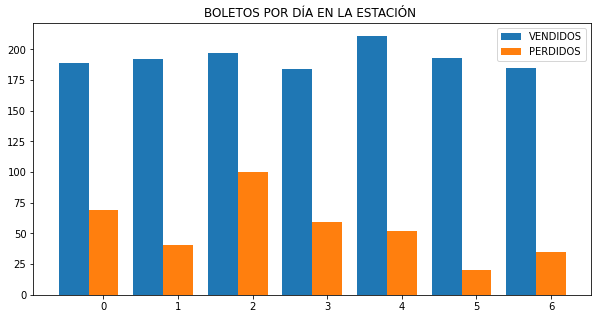

In [84]:

#///////////////////////////////////Grafica 2
plt.figure(figsize=(10,5), )
nombres = ["BOLETOS PERDIDOS ","BOLETOS VENDIDOS"]

ancho_barras =0.40
indice_barras = np.arange((len(list(boletosPorDia.keys()))))

titulo="BOLETOS POR DÍA EN LA ESTACIÓN "
plt.title(titulo)

plt.bar(indice_barras, list(boletosPorDia.values()), width=ancho_barras, align='center', label='VENDIDOS')
plt.bar(indice_barras+ ancho_barras, list(contarBoletosPerdidos.values()), width=ancho_barras, align='center', label= 'PERDIDOS')
plt.xticks(indice_barras + ancho_barras, (list(boletosPorDia.keys())))
plt.legend(loc='best')
plt.show()

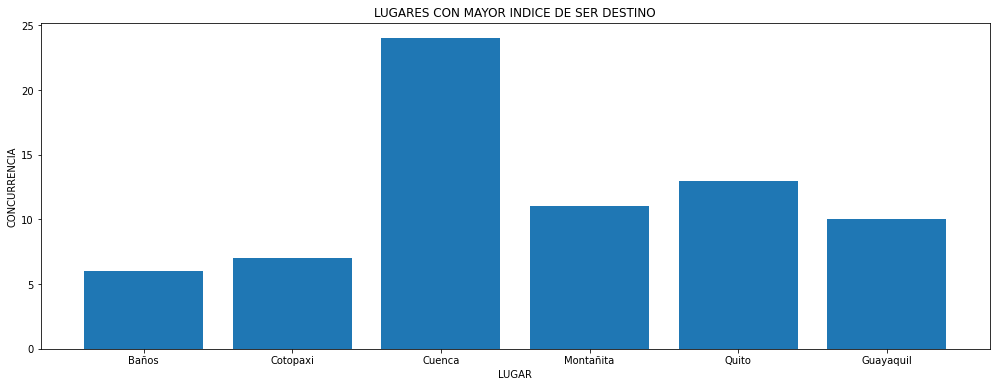

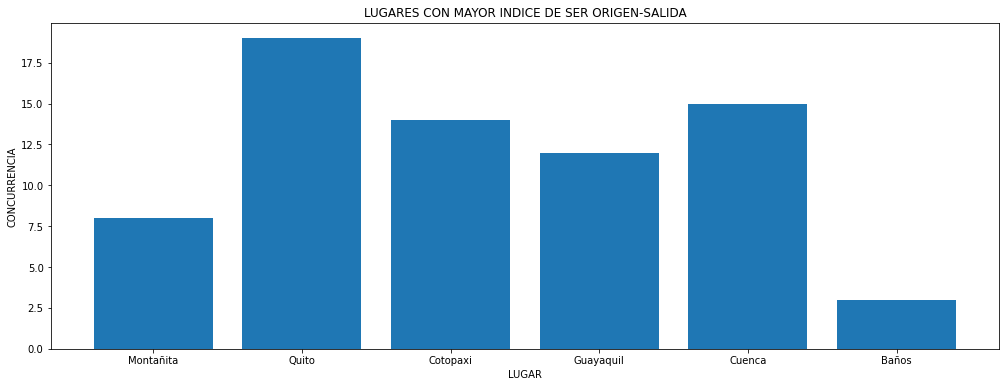

In [85]:
etiquetaG = list(contVisitarLugar.keys())
valores = list(contVisitarLugar.values())
plt.figure(figsize=(17,6), )
plt.bar(range(len(contVisitarLugar)), valores, align="center", tick_label=etiquetaG)
plt.title("LUGARES CON MAYOR INDICE DE SER DESTINO")
plt.xlabel("LUGAR")
plt.ylabel("CONCURRENCIA")
plt.show()

etiquetaG = list(lugarOrigen.keys())
valores = list(lugarOrigen.values())
plt.figure(figsize=(17,6), )
plt.bar(range(len(lugarOrigen)), valores, align="center", tick_label=etiquetaG)
plt.title("LUGARES CON MAYOR INDICE DE SER ORIGEN-SALIDA")
plt.xlabel("LUGAR")
plt.ylabel("CONCURRENCIA")
plt.show()


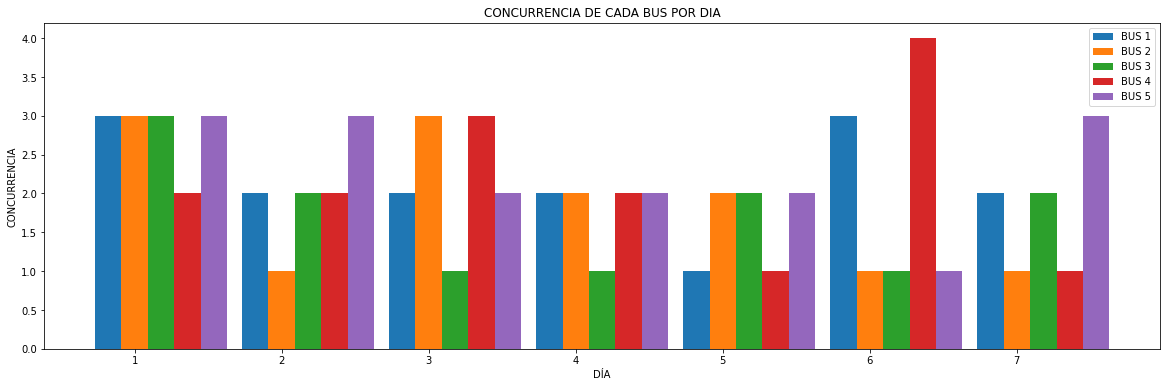

In [86]:

etiquetao = list(buses1.keys())
etiqueta = [x+1 for x in etiquetao] 
grupos = len(buses1)
indice_barras = np.arange(grupos)
ancho_barras =0.18
 
plt.figure(figsize=(20,6),)
plt.bar(indice_barras, list(buses1.values()), width=ancho_barras, label='BUS 1')
plt.bar(indice_barras + (ancho_barras), list(buses2.values()), width=ancho_barras, label='BUS 2')
plt.bar(indice_barras + (ancho_barras*2), list(buses3.values()), width=ancho_barras, label='BUS 3')
plt.bar(indice_barras + (ancho_barras*3), list(buses4.values()), width=ancho_barras, label='BUS 4')
plt.bar(indice_barras + (ancho_barras*4), list(buses5.values()), width=ancho_barras, label='BUS 5')

plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, (etiqueta))

plt.title('CONCURRENCIA DE CADA BUS POR DIA')
plt.ylabel('CONCURRENCIA')
plt.xlabel('DÍA')
 
plt.show()

